In [133]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [134]:
spy_data = pd.read_csv('SPY.csv')
ko_data = pd.read_csv('KO.csv')

In [135]:
spy_data["True Label"] = spy_data["Return"].map(lambda x:'+' if x>=0 else '-')
print("Question 1) 1. S&P-500")
spy_data[["Date","Return", "True Label"]]

Question 1) 1. S&P-500


,Date,Return,True Label
0,2016-01-04,0.000000,+
1,2016-01-05,0.001692,+
2,2016-01-06,-0.012614,-
3,2016-01-07,-0.023992,-
4,2016-01-08,-0.010977,-
...,...,...,...
1253,2020-12-23,0.000899,+
1254,2020-12-24,0.003890,+
1255,2020-12-28,0.008591,+
1256,2020-12-29,-0.001908,-


In [136]:
ko_data["True Label"] = ko_data["Return"].map(lambda x:'+' if x>=0 else '-')
print("Question 1) 1. KO stock")
ko_data[["Date","Return", "True Label"]]

Question 1) 1. KO stock


,Date,Return,True Label
0,2016-01-04,0.000000,+
1,2016-01-05,0.003538,+
2,2016-01-06,-0.005405,-
3,2016-01-07,-0.016541,-
4,2016-01-08,-0.002643,-
...,...,...,...
1253,2020-12-23,0.006065,+
1254,2020-12-24,0.006782,+
1255,2020-12-28,0.013473,+
1256,2020-12-29,-0.000554,-


In [137]:
count_series = spy_data[spy_data["Year"]<2019]["True Label"].value_counts()
p_star_spy = (count_series['+']/count_series.sum())
print("Question 1) 2.")
print("S&P-500 p* =",p_star_spy)

Question 1) 2.
S&P-500 p* = 0.5543766578249337


In [138]:
count_series = ko_data[ko_data["Year"]<2019]["True Label"].value_counts()
p_star_ko = (count_series['+']/count_series.sum())
print("Question 1) 2.")
print("KO p* =",p_star_ko)

Question 1) 2.
KO p* = 0.5411140583554377


In [139]:
print("Question 1) 3.")
label = np.array(spy_data[spy_data["Year"]<2019]["True Label"])
label_string = np.array2string(label).replace("\n","").replace("'","").replace("[","").replace("]","").replace(" ", "")
for k in [1,2,3]:
    print("S&P-500 k="+str(k)+":")
    print(label_string.count(("-"*k)+"-"), label_string.count(("-"*k)+"+"))
    print(("-"*k)+"-",":",label_string.count(("-"*k)+"-")/(label_string.count(("-"*k)+"+")+label_string.count(("-"*k)+"-")))
    print(("-"*k)+"+",":",label_string.count(("-"*k)+"+")/(label_string.count(("-"*k)+"+")+label_string.count(("-"*k)+"-")))

Question 1) 3.
S&P-500 k=1:
96 200
-- : 0.32432432432432434
-+ : 0.6756756756756757
S&P-500 k=2:
36 81
--- : 0.3076923076923077
--+ : 0.6923076923076923
S&P-500 k=3:
14 35
---- : 0.2857142857142857
---+ : 0.7142857142857143


In [140]:
print("Question 1) 3.")
label = np.array(ko_data[ko_data["Year"]<2019]["True Label"])
label_string = np.array2string(label).replace("\n","").replace("'","").replace("[","").replace("]","").replace(" ", "")
for k in [1,2,3]:
    print("KO k="+str(k)+":")
    print(("-"*k)+"-",":",label_string.count(("-"*k)+"-")/(label_string.count(("-"*k)+"+")+label_string.count(("-"*k)+"-")))
    print(("-"*k)+"+",":",label_string.count(("-"*k)+"+")/(label_string.count(("-"*k)+"+")+label_string.count(("-"*k)+"-")))

Question 1) 3.
KO k=1:
-- : 0.3708609271523179
-+ : 0.6291390728476821
KO k=2:
--- : 0.31343283582089554
--+ : 0.6865671641791045
KO k=3:
---- : 0.3103448275862069
---+ : 0.6896551724137931


In [141]:
print("Question 1) 4.")
label = np.array(spy_data[spy_data["Year"]<2019]["True Label"])
label_string = np.array2string(label).replace("\n","").replace("'","").replace("[","").replace("]","").replace(" ", "")
for k in [1,2,3]:
    print("S&P-500 k="+str(k)+":")
    # print(label_string.count(("+"*k)+"+"), label_string.count(("+"*k)+"-"))
    print(("+"*k)+"+",":",label_string.count(("+"*k)+"+")/(label_string.count(("+"*k)+"+")+label_string.count(("+"*k)+"-")))
    print(("+"*k)+"-",":",label_string.count(("+"*k)+"-")/(label_string.count(("+"*k)+"+")+label_string.count(("+"*k)+"-")))

Question 1) 4.
S&P-500 k=1:
++ : 0.41690962099125367
+- : 0.5830903790087464
S&P-500 k=2:
+++ : 0.38285714285714284
++- : 0.6171428571428571
S&P-500 k=3:
++++ : 0.30952380952380953
+++- : 0.6904761904761905


In [142]:
print("Question 1) 4.")
label = np.array(ko_data[ko_data["Year"]<2019]["True Label"])
label_string = np.array2string(label).replace("\n","").replace("'","").replace("[","").replace("]","").replace(" ", "")
for k in [1,2,3]:
    print("KO k="+str(k)+":")
    print(("+"*k)+"+",":",label_string.count(("+"*k)+"+")/(label_string.count(("+"*k)+"+")+label_string.count(("+"*k)+"-")))
    print(("+"*k)+"-",":",label_string.count(("+"*k)+"-")/(label_string.count(("+"*k)+"+")+label_string.count(("+"*k)+"-")))

Question 1) 4.
KO k=1:
++ : 0.43283582089552236
+- : 0.5671641791044776
KO k=2:
+++ : 0.3614457831325301
++- : 0.6385542168674698
KO k=3:
++++ : 0.38095238095238093
+++- : 0.6190476190476191


In [143]:
def w_true_label_predictions(ticker_dataFrame, w, p_star):
    label = np.array(ticker_dataFrame[ticker_dataFrame["Year"]<2019]["True Label"])
    label_string = np.array2string(label).replace("\n","").replace("'","").replace("[","").replace("]","").replace(" ", "")
    dic = defaultdict(lambda:defaultdict(lambda:0))
    for i in range(w,len(label_string)):
        dic[label_string[i-w:i]][label_string[i]]+=1
    dic
    test = ticker_dataFrame[ticker_dataFrame["Year"]>2018]
    temp = np.array(ticker_dataFrame.iloc[test.index[0]-w:]["True Label"])
    store = []
    for i in range(w,len(temp)):
        if dic["".join(temp[i-w:i])]["+"] == 0 and dic["".join(temp[i-w:i])]["-"] == 0:
            store.append("+") if p_star>=0.5 else store.append("-")
        else:
            store.append("+") if dic["".join(temp[i-w:i])]["+"]>=dic["".join(temp[i-w:i])]["-"] else store.append("-")
    col = "Predict Label"+" "+str(w)
    test.loc[:,col] = store
    return test

In [144]:
test_spy = w_true_label_predictions(spy_data,2,p_star_spy)
# print(test_spy[test_spy["True Label"] == test_spy["Predict Label "+str(2)]].shape[0]/test_spy.shape[0])
test_spy["Predict Label "+str(3)] = w_true_label_predictions(spy_data,3,p_star_spy)["Predict Label "+str(3)]
test_spy["Predict Label "+str(4)] = w_true_label_predictions(spy_data,4,p_star_spy)["Predict Label "+str(4)]
print("Question 2) 1. S&P-500")
test_spy[["Date","Return", "True Label", "Predict Label 2", "Predict Label 3", "Predict Label 4"]]

Question 2) 1. S&P-500


,Date,Return,True Label,Predict Label 2,Predict Label 3,Predict Label 4
754,2019-01-02,0.001040,+,+,+,-
755,2019-01-03,-0.023863,-,+,+,+
756,2019-01-04,0.033496,+,+,+,+
757,2019-01-07,0.007885,+,+,+,-
758,2019-01-08,0.009395,+,+,+,+
...,...,...,...,...,...,...
1253,2020-12-23,0.000899,+,+,+,+
1254,2020-12-24,0.003890,+,+,+,+
1255,2020-12-28,0.008591,+,+,+,+
1256,2020-12-29,-0.001908,-,+,-,-


In [145]:
test_ko = w_true_label_predictions(ko_data,2,p_star_ko)
# print(test_ko[test_ko["True Label"] == test_ko["Predict Label "+str(2)]].shape[0]/test_ko.shape[0])
test_ko["Predict Label "+str(3)] = w_true_label_predictions(ko_data,3,p_star_ko)["Predict Label "+str(3)]
test_ko["Predict Label "+str(4)] = w_true_label_predictions(ko_data,4,p_star_ko)["Predict Label "+str(4)]
print("Question 2) 1. KO")
test_ko[["Date","Return", "True Label", "Predict Label 2", "Predict Label 3", "Predict Label 4"]]

Question 2) 1. KO


,Date,Return,True Label,Predict Label 2,Predict Label 3,Predict Label 4
754,2019-01-02,-0.008870,-,+,+,+
755,2019-01-03,-0.006179,-,+,+,+
756,2019-01-04,0.019940,+,+,+,+
757,2019-01-07,-0.013034,-,+,+,+
758,2019-01-08,0.011289,+,+,+,-
...,...,...,...,...,...,...
1253,2020-12-23,0.006065,+,+,+,+
1254,2020-12-24,0.006782,+,+,+,+
1255,2020-12-28,0.013473,+,+,-,-
1256,2020-12-29,-0.000554,-,+,+,+


In [146]:
analysis_frame = pd.DataFrame({
    "W":["2","3","4","Ensemble"]*2,
    "ticker":["S&P-500"]*4+["KO"]*4,
    "TP":np.ones(8),
    "FP":np.ones(8),
    "TN":np.ones(8),
    "FN":np.ones(8),
    "accuracy":np.ones(8),
    "TPR":np.ones(8),
    "TNR":np.ones(8)
})

In [147]:
print("Question 2) 2. S&P-500")
for k in  [2,3,4]:
    print("W = "+str(k),"accuracy of '+' : ",test_spy[test_spy["True Label"] == "+"][test_spy["True Label"] == test_spy["Predict Label "+str(k)]].shape[0]/test_spy[test_spy["True Label"] == "+"].shape[0])
    print("W = "+str(k),"accuracy of '-' : ",test_spy[test_spy["True Label"] == "-"][test_spy["True Label"] == test_spy["Predict Label "+str(k)]].shape[0]/test_spy[test_spy["True Label"] == "-"].shape[0])
    print("W = "+str(k),"total accuracy : ",test_spy[test_spy["True Label"] == test_spy["Predict Label "+str(k)]].shape[0]/test_spy.shape[0])
    analysis_frame["accuracy"].iloc[k-2] = test_spy[test_spy["True Label"] == test_spy["Predict Label "+str(k)]].shape[0]/test_spy.shape[0]
    print("")

Question 2) 2. S&P-500
W = 2 accuracy of '+' :  1.0
W = 2 accuracy of '-' :  0.0
W = 2 total accuracy :  0.5853174603174603

W = 3 accuracy of '+' :  0.8372881355932204
W = 3 accuracy of '-' :  0.22966507177033493
W = 3 total accuracy :  0.5853174603174603

W = 4 accuracy of '+' :  0.8
W = 4 accuracy of '-' :  0.2583732057416268
W = 4 total accuracy :  0.5753968253968254



In [148]:
print("Question 2) 2. KO")
for k in  [2,3,4]:
    print("W = "+str(k),"accuracy of '+' : ",test_ko[test_ko["True Label"] == "+"][test_ko["True Label"] == test_ko["Predict Label "+str(k)]].shape[0]/test_ko[test_ko["True Label"] == "+"].shape[0])
    print("W = "+str(k),"accuracy of '-' : ",test_ko[test_ko["True Label"] == "-"][test_ko["True Label"] == test_ko["Predict Label "+str(k)]].shape[0]/test_ko[test_ko["True Label"] == "-"].shape[0])
    print("W = "+str(k),"accuracy - ",test_ko[test_ko["True Label"] == test_ko["Predict Label "+str(k)]].shape[0]/test_ko.shape[0])
    analysis_frame["accuracy"].iloc[4+k-2] = test_ko[test_ko["True Label"] == test_ko["Predict Label "+str(k)]].shape[0]/test_ko.shape[0]
    print("")

Question 2) 2. KO
W = 2 accuracy of '+' :  1.0
W = 2 accuracy of '-' :  0.0
W = 2 accuracy -  0.5337301587301587

W = 3 accuracy of '+' :  0.8661710037174721
W = 3 accuracy of '-' :  0.12340425531914893
W = 3 accuracy -  0.5198412698412699

W = 4 accuracy of '+' :  0.6468401486988847
W = 4 accuracy of '-' :  0.28936170212765955
W = 4 accuracy -  0.4801587301587302



In [149]:
test_spy["Ensemble Predict"] = test_spy[["Predict Label 2","Predict Label 3","Predict Label 4"]].mode(axis=1)
test_spy[test_spy["Ensemble Predict"] == test_spy["True Label"]].shape[0]/test_spy.shape[0]
print("Question 3) 1. S&P-500")
test_spy[["Date","Return", "True Label", "Predict Label 2", "Predict Label 3", "Predict Label 4", "Ensemble Predict"]]

Question 3) 1. S&P-500


,Date,Return,True Label,Predict Label 2,Predict Label 3,Predict Label 4,Ensemble Predict
754,2019-01-02,0.001040,+,+,+,-,+
755,2019-01-03,-0.023863,-,+,+,+,+
756,2019-01-04,0.033496,+,+,+,+,+
757,2019-01-07,0.007885,+,+,+,-,+
758,2019-01-08,0.009395,+,+,+,+,+
...,...,...,...,...,...,...,...
1253,2020-12-23,0.000899,+,+,+,+,+
1254,2020-12-24,0.003890,+,+,+,+,+
1255,2020-12-28,0.008591,+,+,+,+,+
1256,2020-12-29,-0.001908,-,+,-,-,-


In [150]:
test_ko["Ensemble Predict"] = test_ko[["Predict Label 2","Predict Label 3","Predict Label 4"]].mode(axis=1)
test_ko[test_ko["Ensemble Predict"] == test_ko["True Label"]].shape[0]/test_ko.shape[0]
print("Question 3) 1. KO")
test_ko[["Date","Return", "True Label", "Predict Label 2", "Predict Label 3", "Predict Label 4", "Ensemble Predict"]]

Question 3) 1. KO


,Date,Return,True Label,Predict Label 2,Predict Label 3,Predict Label 4,Ensemble Predict
754,2019-01-02,-0.008870,-,+,+,+,+
755,2019-01-03,-0.006179,-,+,+,+,+
756,2019-01-04,0.019940,+,+,+,+,+
757,2019-01-07,-0.013034,-,+,+,+,+
758,2019-01-08,0.011289,+,+,+,-,+
...,...,...,...,...,...,...,...
1253,2020-12-23,0.006065,+,+,+,+,+
1254,2020-12-24,0.006782,+,+,+,+,+
1255,2020-12-28,0.013473,+,+,-,-,-
1256,2020-12-29,-0.000554,-,+,+,+,+


In [151]:
print("Question 3) 2. S&P-500")
print("Ensemble","accuracy of '+' : ",test_spy[test_spy["True Label"] == "+"][test_spy["True Label"] == test_spy["Ensemble Predict"]].shape[0]/test_spy[test_spy["True Label"] == "+"].shape[0])
print("Ensemble","accuracy of '-' : ",test_spy[test_spy["True Label"] == "-"][test_spy["True Label"] == test_spy["Ensemble Predict"]].shape[0]/test_spy[test_spy["True Label"] == "-"].shape[0])
print("Ensemble","total accuracy : ",test_spy[test_spy["True Label"] == test_spy["Ensemble Predict"]].shape[0]/test_spy.shape[0])
analysis_frame["accuracy"].iloc[3] = test_spy[test_spy["True Label"] == test_spy["Ensemble Predict"]].shape[0]/test_spy.shape[0]

Question 3) 2. S&P-500
Ensemble accuracy of '+' :  0.9220338983050848
Ensemble accuracy of '-' :  0.11961722488038277
Ensemble total accuracy :  0.5892857142857143


In [152]:
print("Question 3) 2. KO")
print("Ensemble","accuracy of '+' : ",test_ko[test_ko["True Label"] == "+"][test_ko["True Label"] == test_ko["Ensemble Predict"]].shape[0]/test_ko[test_ko["True Label"] == "+"].shape[0])
print("Ensemble","accuracy of '-' : ",test_ko[test_ko["True Label"] == "-"][test_ko["True Label"] == test_ko["Ensemble Predict"]].shape[0]/test_ko[test_ko["True Label"] == "-"].shape[0])
print("Ensemble","total accuracy : ",test_ko[test_ko["True Label"] == test_ko["Ensemble Predict"]].shape[0]/test_ko.shape[0])
analysis_frame["accuracy"].iloc[7] = test_ko[test_ko["True Label"] == test_ko["Ensemble Predict"]].shape[0]/test_ko.shape[0]

Question 3) 2. KO
Ensemble accuracy of '+' :  0.9368029739776952
Ensemble accuracy of '-' :  0.05106382978723404
Ensemble total accuracy :  0.5238095238095238


In [153]:
print("Q4) 1. ,2. ,3. ,4. ,5. ,6. S&P-500")
for x in ["2","3","4"]:
    tp = test_spy[test_spy["True Label"] == test_spy["Predict Label "+x]][test_spy["Predict Label "+x] == "+"].shape[0] # TP
    fp = test_spy[test_spy["True Label"] != test_spy["Predict Label "+x]][test_spy["Predict Label "+x] == "+"].shape[0] # FP
    tn = test_spy[test_spy["True Label"] == test_spy["Predict Label "+x]][test_spy["Predict Label "+x] == "-"].shape[0] # TN
    fn = test_spy[test_spy["True Label"] != test_spy["Predict Label "+x]][test_spy["Predict Label "+x] == "-"].shape[0] # FN
    print("W="+str(x))
    print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
    print("TPR -",tp/(tp+fn))
    print("TNR -",tn/(tn+fp))
    print("")
    analysis_frame["TP"].iloc[int(x)-2] = tp
    analysis_frame["FP"].iloc[int(x)-2] = fp
    analysis_frame["TN"].iloc[int(x)-2] = tn
    analysis_frame["FN"].iloc[int(x)-2] = fn
    analysis_frame["TPR"].iloc[int(x)-2] = tp/(tp+fn)
    analysis_frame["TNR"].iloc[int(x)-2] = tn/(tn+fp)
tp = test_spy[test_spy["True Label"] == test_spy["Ensemble Predict"]][test_spy["Ensemble Predict"] == "+"].shape[0] # TP
fp = test_spy[test_spy["True Label"] != test_spy["Ensemble Predict"]][test_spy["Ensemble Predict"] == "+"].shape[0] # FP
tn = test_spy[test_spy["True Label"] == test_spy["Ensemble Predict"]][test_spy["Ensemble Predict"] == "-"].shape[0] # TN
fn = test_spy[test_spy["True Label"] != test_spy["Ensemble Predict"]][test_spy["Ensemble Predict"] == "-"].shape[0] # FN
print("Ensemble")
print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
print("TPR -",tp/(tp+fn))
print("TNR -",tn/(tn+fp))
analysis_frame["TP"].iloc[3] = tp
analysis_frame["FP"].iloc[3] = fp
analysis_frame["TN"].iloc[3] = tn
analysis_frame["FN"].iloc[3] = fn
analysis_frame["TPR"].iloc[3] = tp/(tp+fn)
analysis_frame["TNR"].iloc[3] = tn/(tn+fp)

Q4) 1. ,2. ,3. ,4. ,5. ,6. S&P-500
W=2
TP - 295 , FP - 209 , TN - 0 , FN -  0
TPR - 1.0
TNR - 0.0

W=3
TP - 247 , FP - 161 , TN - 48 , FN -  48
TPR - 0.8372881355932204
TNR - 0.22966507177033493

W=4
TP - 236 , FP - 155 , TN - 54 , FN -  59
TPR - 0.8
TNR - 0.2583732057416268

Ensemble
TP - 272 , FP - 184 , TN - 25 , FN -  23
TPR - 0.9220338983050848
TNR - 0.11961722488038277


In [154]:
print("Q4) 1. ,2. ,3. ,4. ,5. ,6. KO")
for x in ["2","3","4"]:
    tp = test_ko[test_ko["True Label"] == test_ko["Predict Label "+x]][test_ko["Predict Label "+x] == "+"].shape[0] # TP
    fp = test_ko[test_ko["True Label"] != test_ko["Predict Label "+x]][test_ko["Predict Label "+x] == "+"].shape[0] # FP
    tn = test_ko[test_ko["True Label"] == test_ko["Predict Label "+x]][test_ko["Predict Label "+x] == "-"].shape[0] # TN
    fn = test_ko[test_ko["True Label"] != test_ko["Predict Label "+x]][test_ko["Predict Label "+x] == "-"].shape[0] # FN
    print("W="+str(x))
    print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
    print("TPR -",tp/(tp+fn))
    print("TNR -",tn/(tn+fp))
    print("")
    analysis_frame["TP"].iloc[4+int(x)-2] = tp
    analysis_frame["FP"].iloc[4+int(x)-2] = fp
    analysis_frame["TN"].iloc[4+int(x)-2] = tn
    analysis_frame["FN"].iloc[4+int(x)-2] = fn
    analysis_frame["TPR"].iloc[4+int(x)-2] = tp/(tp+fn)
    analysis_frame["TNR"].iloc[4+int(x)-2] = tn/(tn+fp)
tp = test_ko[test_ko["True Label"] == test_ko["Ensemble Predict"]][test_ko["Ensemble Predict"] == "+"].shape[0] # TP
fp = test_ko[test_ko["True Label"] != test_ko["Ensemble Predict"]][test_ko["Ensemble Predict"] == "+"].shape[0] # FP
tn = test_ko[test_ko["True Label"] == test_ko["Ensemble Predict"]][test_ko["Ensemble Predict"] == "-"].shape[0] # TN
fn = test_ko[test_ko["True Label"] != test_ko["Ensemble Predict"]][test_ko["Ensemble Predict"] == "-"].shape[0] # FN
print("Ensemble")
print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
print("TPR -",tp/(tp+fn))
print("TNR -",tn/(tn+fp))
analysis_frame["TP"].iloc[7] = tp
analysis_frame["FP"].iloc[7] = fp
analysis_frame["TN"].iloc[7] = tn
analysis_frame["FN"].iloc[7] = fn
analysis_frame["TPR"].iloc[7] = tp/(tp+fn)
analysis_frame["TNR"].iloc[7] = tn/(tn+fp)

Q4) 1. ,2. ,3. ,4. ,5. ,6. KO
W=2
TP - 269 , FP - 235 , TN - 0 , FN -  0
TPR - 1.0
TNR - 0.0

W=3
TP - 233 , FP - 206 , TN - 29 , FN -  36
TPR - 0.8661710037174721
TNR - 0.12340425531914893

W=4
TP - 174 , FP - 167 , TN - 68 , FN -  95
TPR - 0.6468401486988847
TNR - 0.28936170212765955

Ensemble
TP - 252 , FP - 223 , TN - 12 , FN -  17
TPR - 0.9368029739776952
TNR - 0.05106382978723404


Q5) 1.


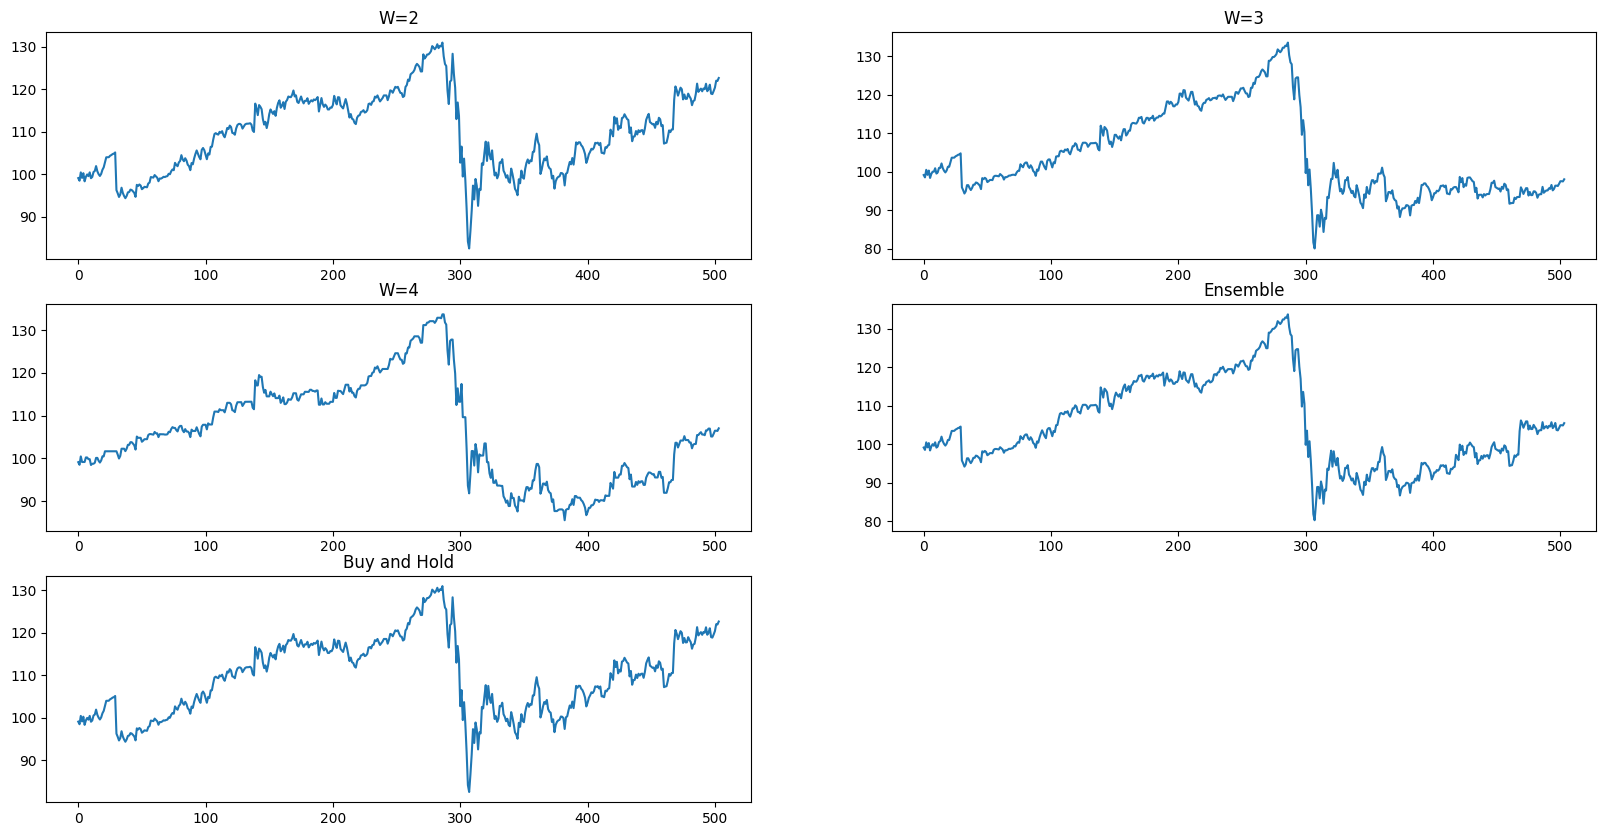

In [155]:
def generate_money_array_best(test, col):
    money =100
    money_array = []
    for i in range(test.shape[0]):
        if test[col].iloc[i] == "+":
            money=money*(1+test["Return"].iloc[i])
            money_array.append(money)
        else:
            money_array.append(money)
    return money_array

def generate_money_array_buy_n_hold(test):
    money =100
    money_array = []
    for i in range(test.shape[0]):
        money=money*(1+test["Return"].iloc[i])
        money_array.append(money)
    return money_array

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.subplot(3, 2, 1)
plt.plot(np.arange(0,test_ko.shape[0]), np.array(generate_money_array_best(test_ko, "Predict Label 2")))
plt.title("W=2")

plt.subplot(3, 2, 2)
plt.plot(np.arange(0,test_ko.shape[0]), np.array(generate_money_array_best(test_ko, "Predict Label 3")))
plt.title("W=3")

plt.subplot(3, 2, 3)
plt.plot(np.arange(0,test_ko.shape[0]), np.array(generate_money_array_best(test_ko, "Predict Label 4")))
plt.title("W=4")

plt.subplot(3, 2, 4)
plt.plot(np.arange(0,test_ko.shape[0]), np.array(generate_money_array_best(test_ko, "Ensemble Predict")))
plt.title("Ensemble")

plt.subplot(3, 2, 5)
plt.plot(np.arange(0,test_ko.shape[0]), np.array(generate_money_array_buy_n_hold(test_ko)))
plt.title("Buy and Hold")
print("Q5) 1.")
plt.show()